<a href="https://colab.research.google.com/github/JayshreeDhaduk2793/MTDS-III-DL/blob/master/DL_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
print('Dimensions: \nRows= {} \nColumns = {}'.format(df.shape[0],df.shape[1]),end='\n\n')
print('Data Type of Each Column:')
print(df.dtypes)

Dimensions: 
Rows= 201 
Columns = 29

Data Type of Each Column:
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


### Correlation b/w **Engine-Size and Price**


In [5]:
df[['engine-size','price']].corr(method='pearson')

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [6]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


## **Peak-RPM** Column Data Type

In [7]:
df['peak-rpm'].dtypes

dtype('float64')


## Relation b/w Engine-Size and Price


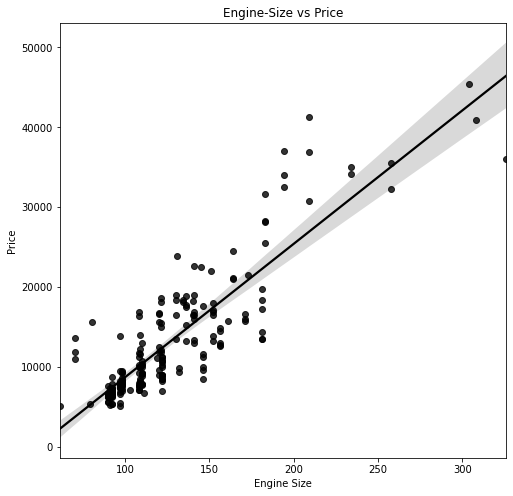

In [9]:
plt.figure(figsize=(8,8))
sns.regplot(x='engine-size', y='price', data=df, color='black')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine-Size vs Price')
plt.show()


Relation b/w Other Categorical Variables and Price

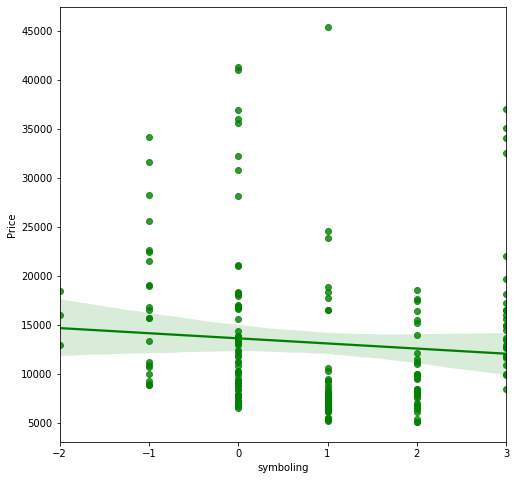

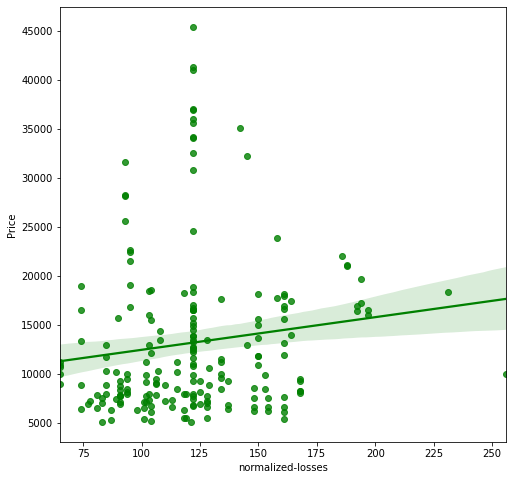

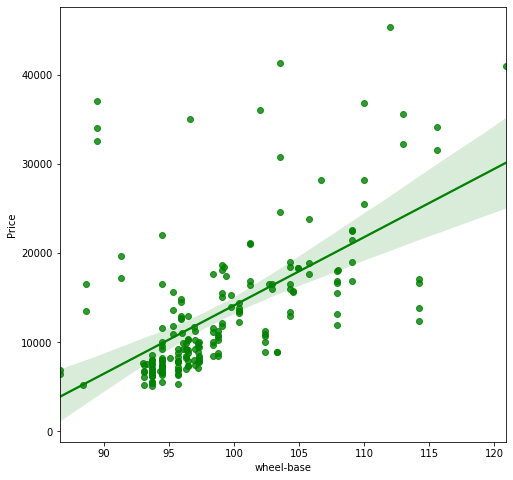

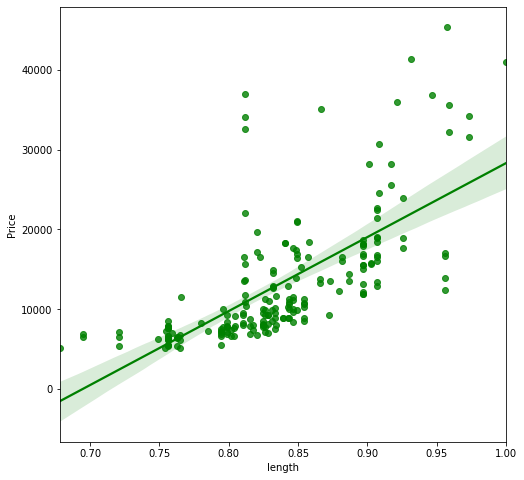

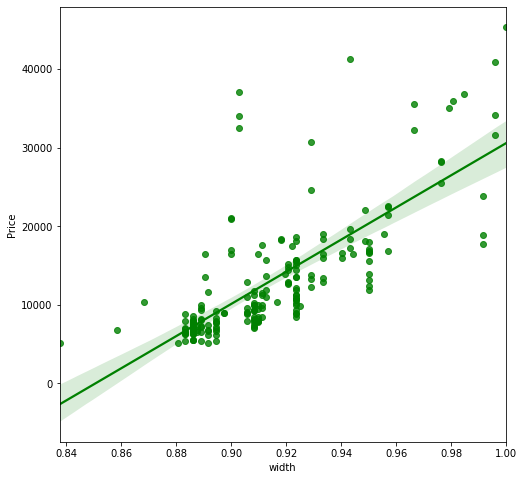

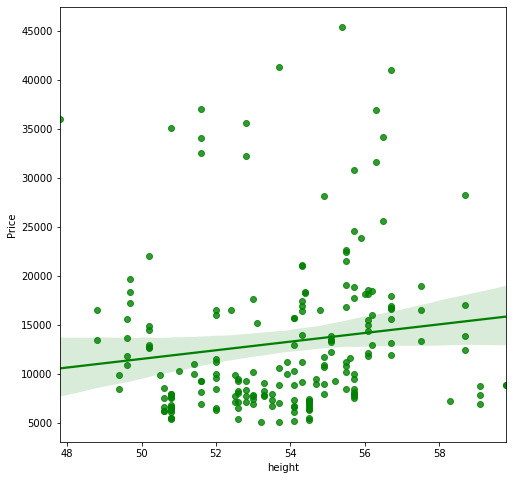

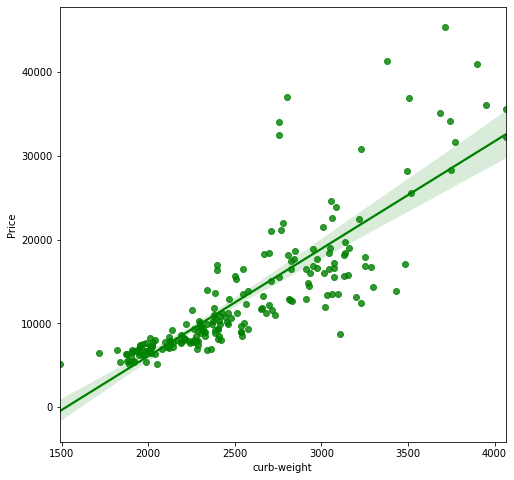

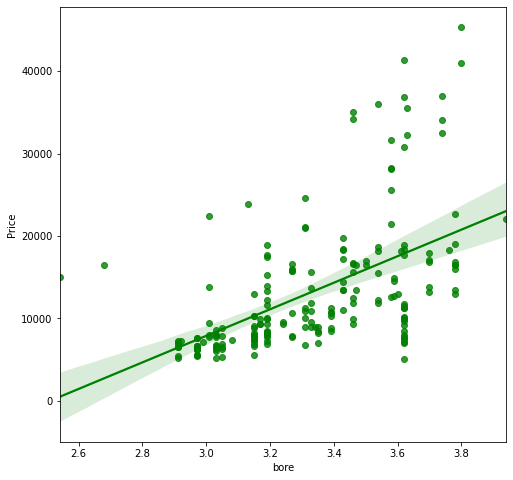

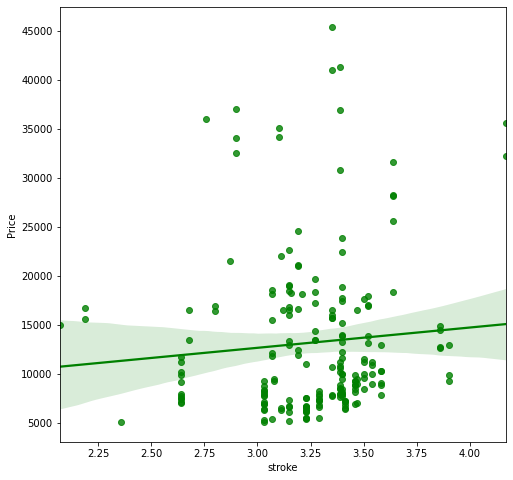

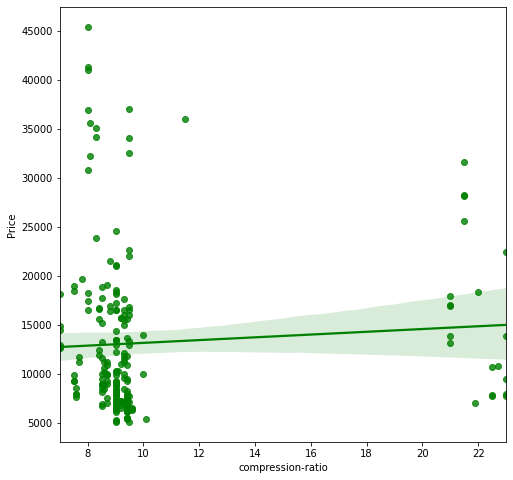

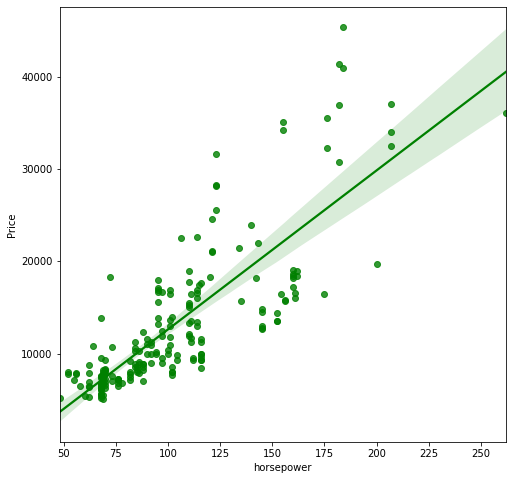

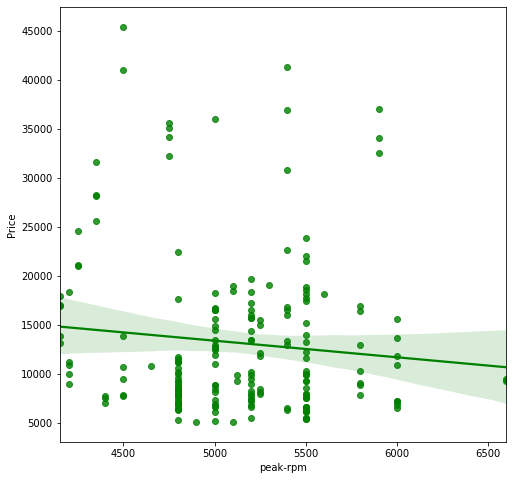

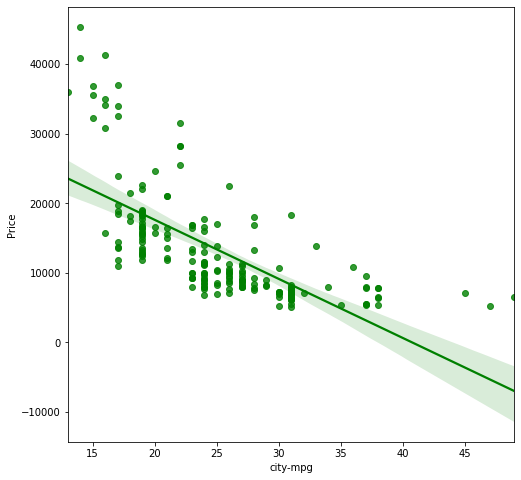

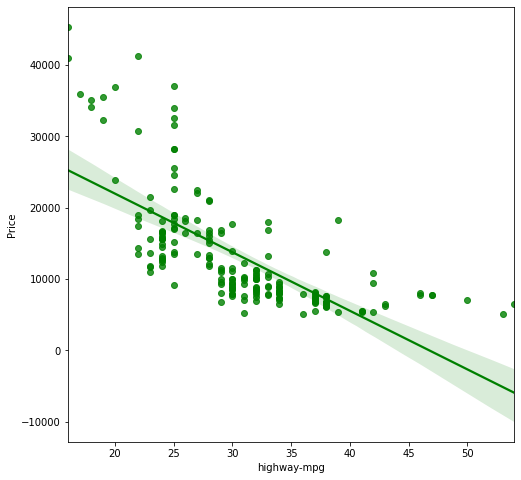

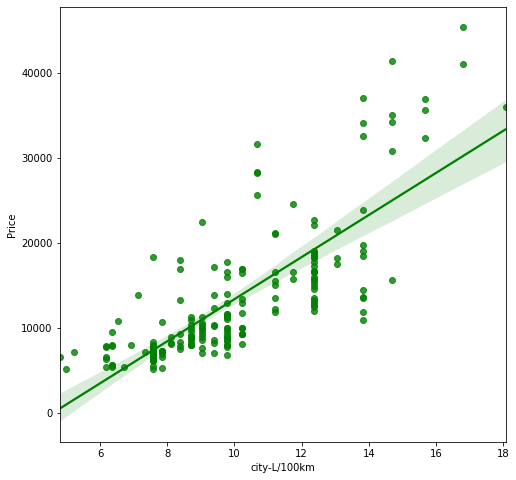

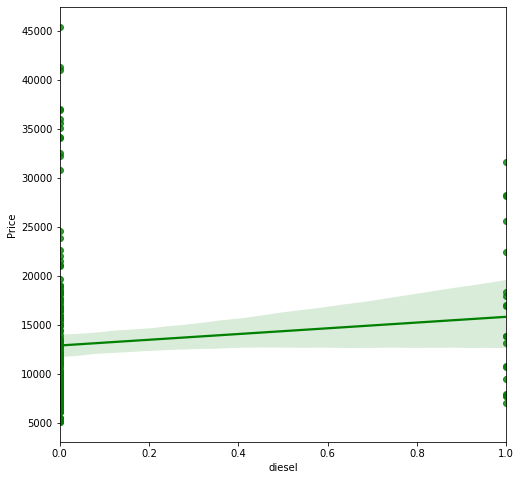

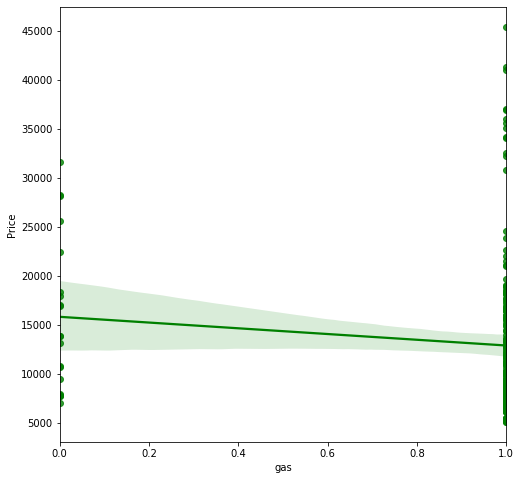

In [14]:
int_cols = df.select_dtypes(include=['int64','float64']).columns

for i in int_cols:
    if(i not in ['engine-size','price']):
        plt.figure(figsize=(8,8))
        sns.regplot(x=i, y='price',data=df,color="green")
        plt.xlabel(i)
        plt.ylabel('Price')
        plt.show()

Pairplot to Check Variables that affect Price

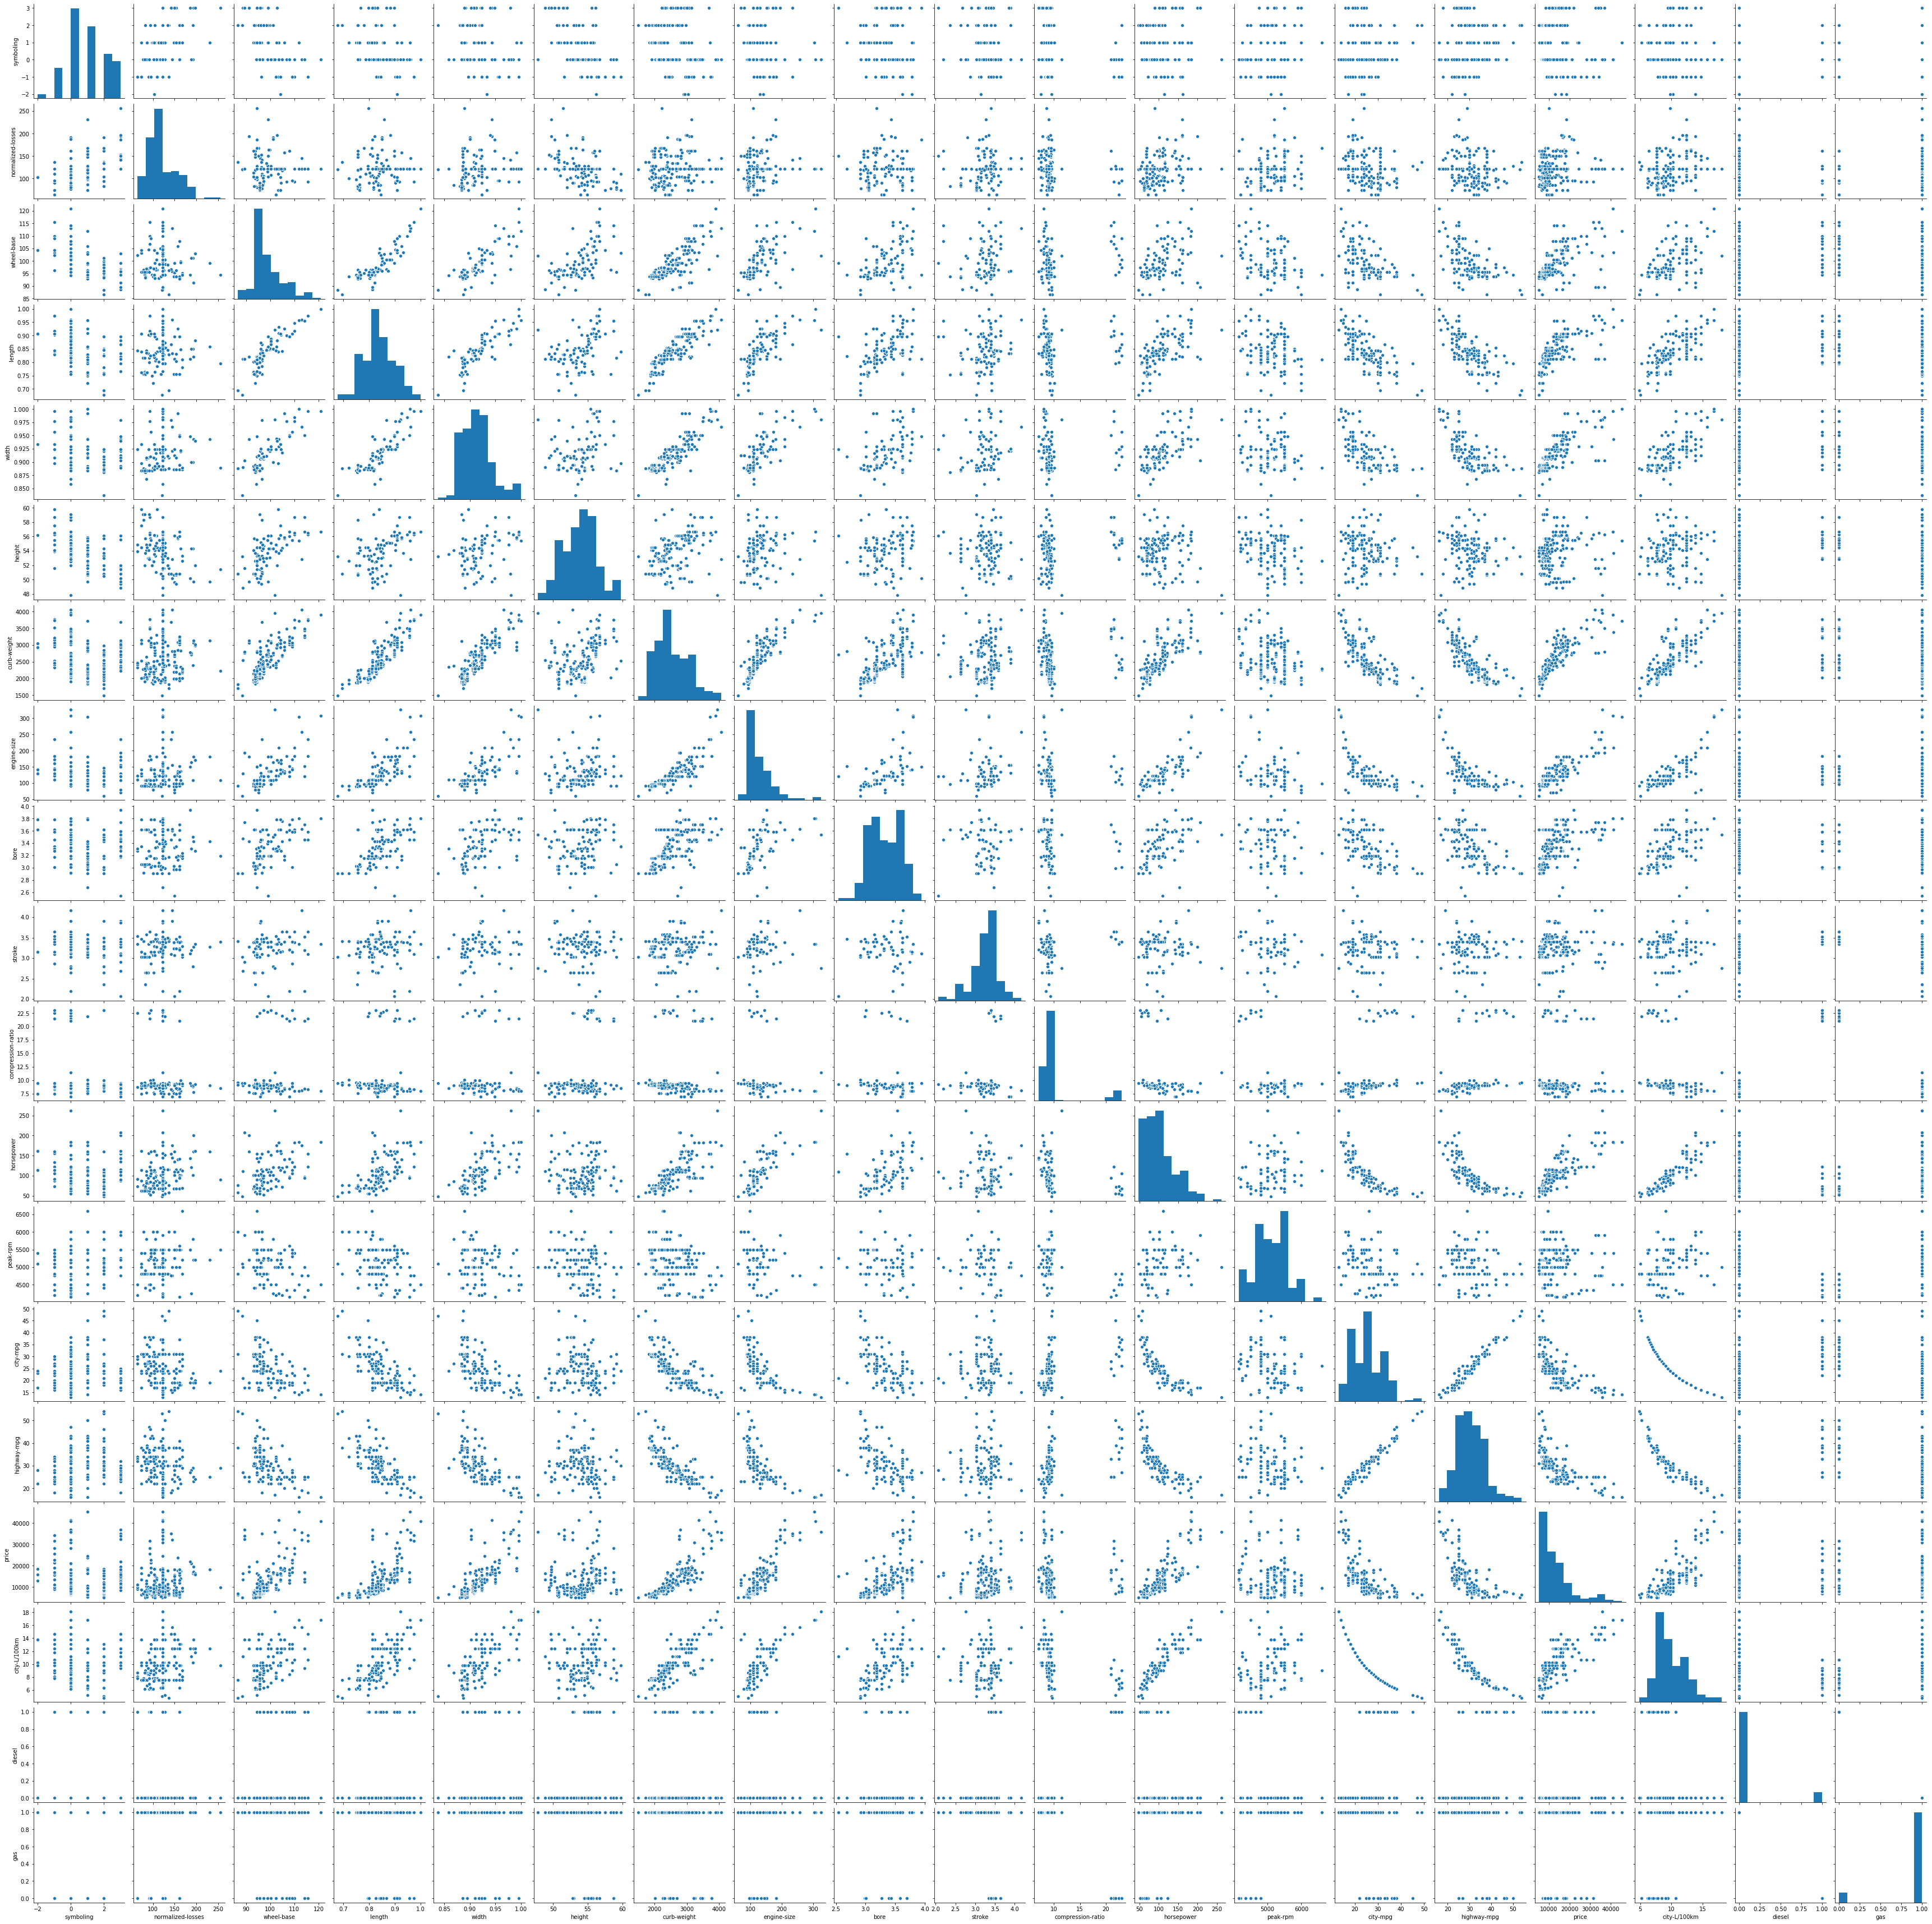

In [15]:

sns.pairplot(df,kind='scatter')

Heatmap to plot the Correlation in the Dataframe

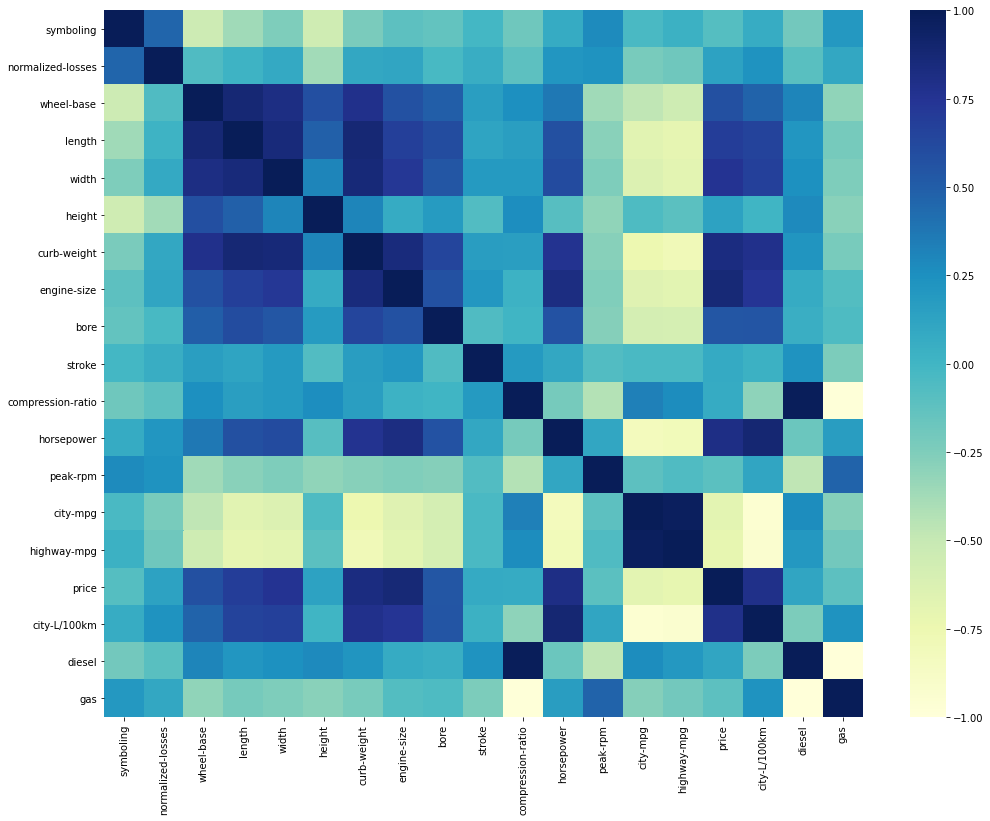

In [16]:
plt.figure(figsize=(17,13))
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

Boxplot: Body-Style vs Price


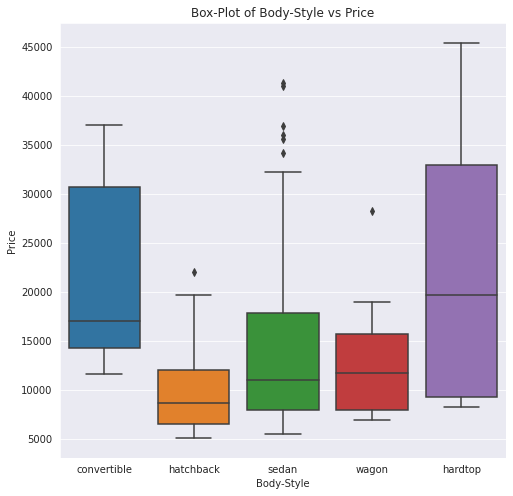

In [17]:

plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.boxplot(x='body-style', y='price', data=df)
plt.title('Box-Plot of Body-Style vs Price')
plt.xlabel('Body-Style')
plt.ylabel('Price')
plt.show()

Boxplot: Other Columns vs Price¶

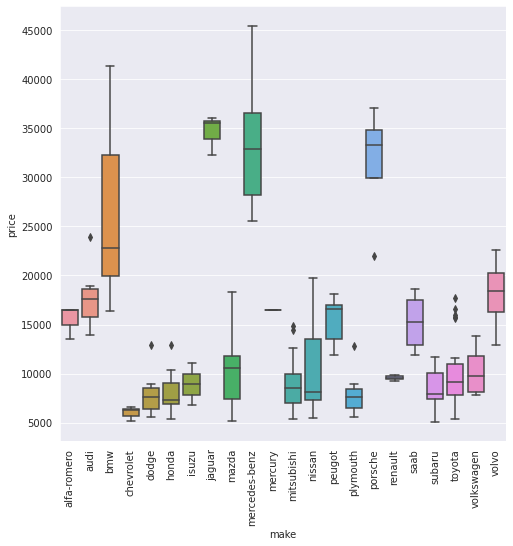

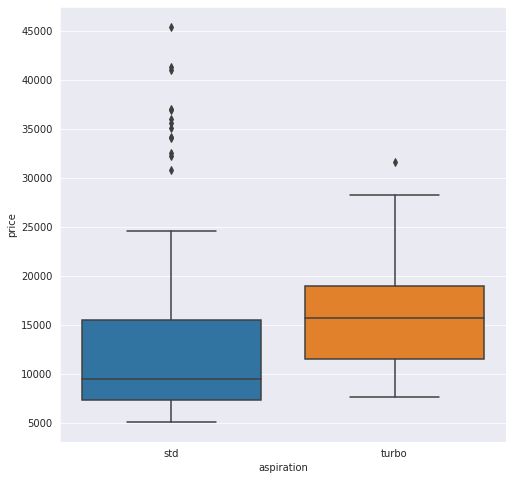

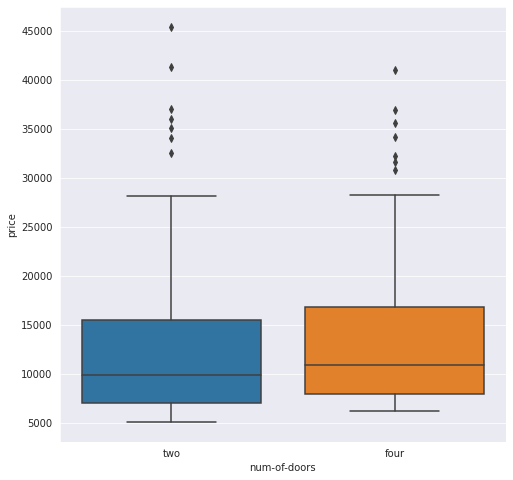

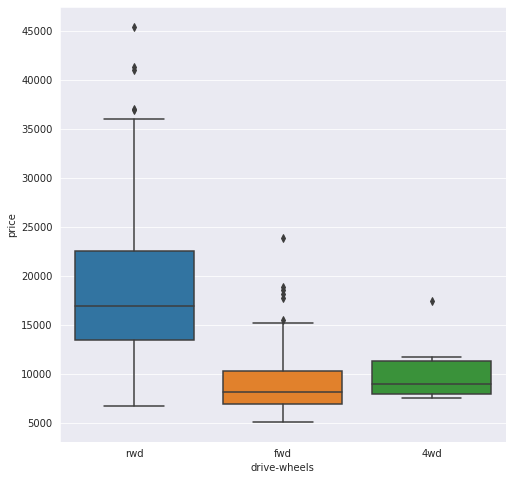

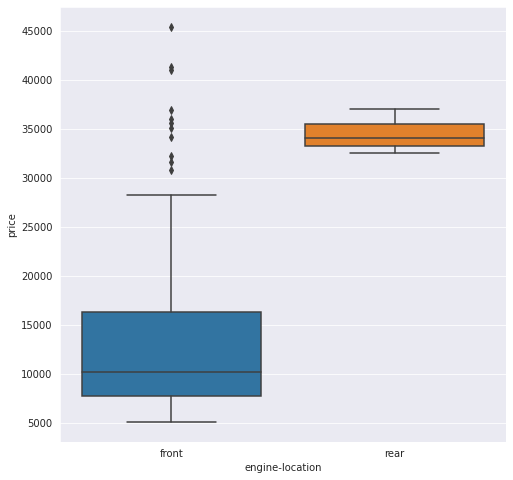

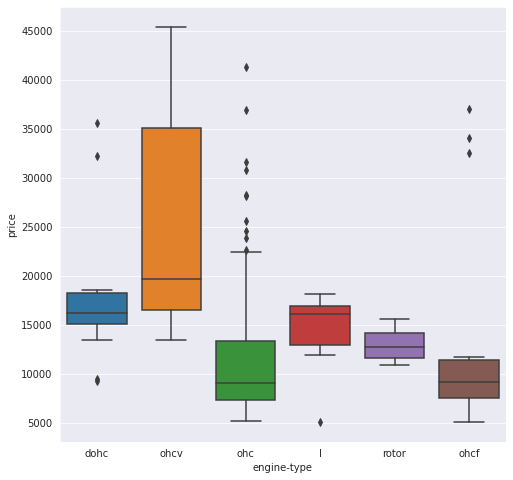

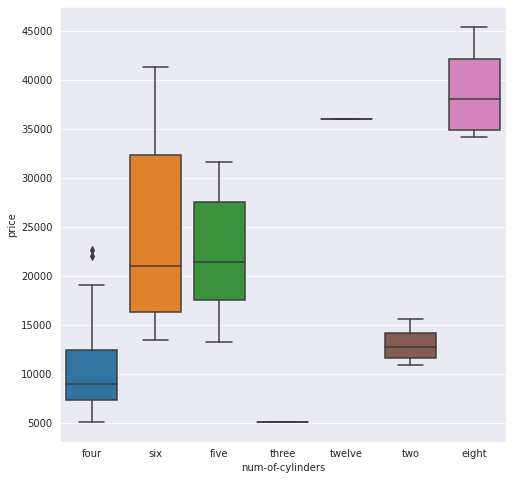

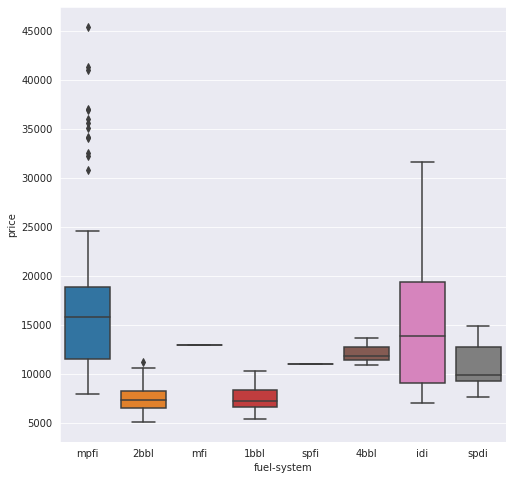

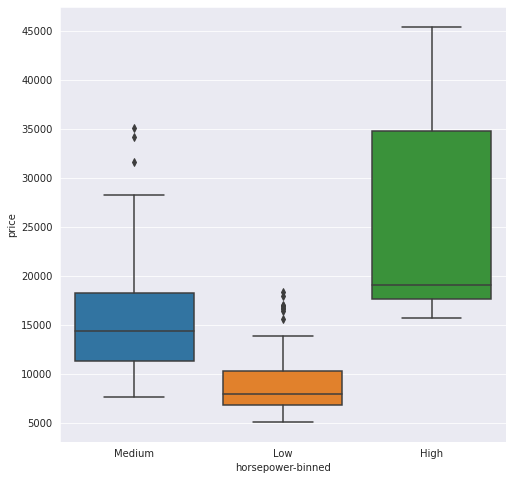

Boxplots help in Finding out which Categories have the Maximum Number of Outliers.


In [18]:

category_columns = df.select_dtypes(include='object').columns
for i in category_columns:
    if(i not in ['body-style','price','make']):
        plt.figure(figsize=(8,8))
        sns.boxplot(x=i, y='price', data=df)
        plt.show()
    elif(i == 'make'):
        plt.figure(figsize=(8,8))
        chart = sns.boxplot(x=i, y='price', data=df)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        plt.show()
        
print('Boxplots help in Finding out which Categories have the Maximum Number of Outliers.')

Descriptive Statistics of Numerical Columns

In [19]:

df.select_dtypes(include=['int64','float64']).describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Categorical Columns


In [20]:

category_stats = df.select_dtypes(include='object').describe()
category_stats

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


Unique Values and Frequency of Categorical Column

In [21]:
category_df = df.select_dtypes(include='object')

for i in category_df.columns:
    print(i,':')
    print(category_df[i].value_counts(), end='\n\n\n')

make :
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64


aspiration :
std      165
turbo     36
Name: aspiration, dtype: int64


num-of-doors :
four    115
two      86
Name: num-of-doors, dtype: int64


body-style :
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64


drive-wheels :
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64


engine-location :
front    198
rear       3
Name: engine-location, dtype: int64


engine-type :
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12


Group by Average Price of Drive-Wheel

In [22]:
df.groupby(['drive-wheels']).mean()['price']

#Group by Average Price of Other Categorical Columns

for i in category_columns:
    if i != 'drive-wheels':
        print(df.groupby([i]).mean()['price'], end='\n\n')

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64

aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64

num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64

body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          

Pivot Tables

In [23]:
grouped_df = pd.DataFrame(df.groupby(['drive-wheels','body-style']).mean()['price'])
grouped_df

price
drive-wheels body-style               
4wd          hatchback     7603.000000
             sedan        12647.333333
             wagon         9095.750000
fwd          convertible  11595.000000
             hardtop       8249.000000
             hatchback     8396.387755
             sedan         9811.800000
             wagon         9997.333333
rwd          convertible  23949.600000
             hardtop      24202.714286
             hatchback    14337.777778
             sedan        21711.833333
             wagon        16994.222222

In [24]:
pd.DataFrame(grouped_df.reset_index().pivot_table(index='drive-wheels',columns='body-style'))

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [25]:
category_columns

Index(['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
       'horsepower-binned'],
      dtype='object')

In [26]:
grouped_df_1 = df.groupby(['make','aspiration']).mean()['price']
pd.DataFrame(grouped_df_1.reset_index().pivot_table(index='make', columns='aspiration'))

price              
aspiration              std         turbo
make                                     
alfa-romero    15498.333333           NaN
audi           16656.000000  23875.000000
bmw            26118.750000           NaN
chevrolet       6007.000000           NaN
dodge           6900.000000   9826.333333
honda           8184.692308           NaN
isuzu           8916.500000           NaN
jaguar         34600.000000           NaN
mazda          10652.882353           NaN
mercedes-benz  38900.000000  28394.000000
mercury                 NaN  16503.000000
mitsubishi      7314.714286  11485.666667
nissan          9869.588235  19699.000000
peugot         14649.000000  16189.166667
plymouth        7004.600000  10360.500000
porsche        31400.500000           NaN
renault         9595.000000           NaN
saab           13642.500000  18385.000000
subaru          7954.200000  11476.500000
toyota          9859.612903  10698.000000
volkswagen      9759.000000  11670.000000
volvo          16197.500000  20302.000000

In [27]:
grouped_df_1 = df.groupby(['engine-type','engine-location']).mean()['price']
pd.DataFrame(grouped_df_1.reset_index().pivot_table(index='engine-type', columns='engine-location'))

price         
engine-location         front     rear
engine-type                           
dohc             18116.416667      NaN
l                14627.583333      NaN
ohc              11567.358621      NaN
ohcf              8541.250000  34528.0
ohcv             25098.384615      NaN
rotor            13020.000000      NaN

In [28]:
grouped_df_1 = df.groupby(['num-of-cylinders','horsepower-binned']).mean()['price']
pd.DataFrame(grouped_df_1.reset_index().pivot_table(index='num-of-cylinders', columns='horsepower-binned'))

price                            
horsepower-binned          High           Low        Medium
num-of-cylinders                                           
eight              43180.000000           NaN  34620.000000
five                        NaN           NaN  22007.600000
four               18281.333333   8961.801802  12828.850000
six                26642.133333           NaN  18721.333333
three                       NaN   5151.000000           NaN
two                         NaN  12145.000000  15645.000000

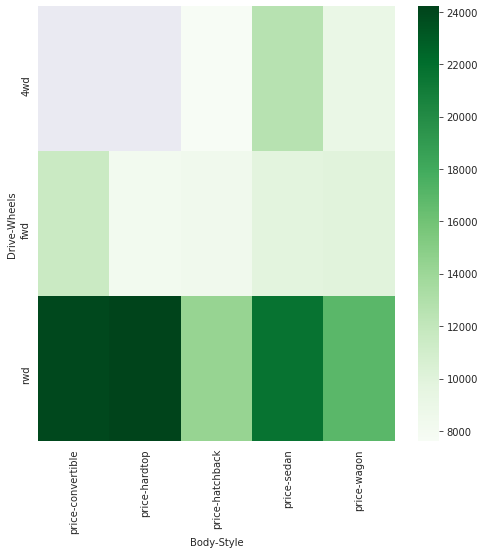

In [29]:
#Heatmap

plt.figure(figsize=(8,8))
sns.heatmap(grouped_df.reset_index().pivot_table(index='drive-wheels',columns='body-style'),cmap='Greens')
plt.xlabel('Body-Style')
plt.ylabel('Drive-Wheels')
plt.show()

Pearson Correlation b/w Wheel-Base and Price

In [30]:
from scipy.stats import pearsonr

corr, p = pearsonr(df['wheel-base'],df['price'])
print('Pearsons Correlation: %.4f' % corr)
print('P Value: %.4f' % p, end='\n\n')
print('Null Hypothesis is rejected as P-Value < 0.05')

Pearsons Correlation: 0.5846
P Value: 0.0000

Null Hypothesis is rejected as P-Value < 0.05


One Way ANOVA b/w Different groups of Drive-Wheels and Price

In [31]:
from scipy.stats import f_oneway

f_oneway(df['price'][df['drive-wheels'] == '4wd'],
               df['price'][df['drive-wheels'] == 'fwd'],
               df['price'][df['drive-wheels'] == 'rwd'])

print("F-statistic=67.95 suggests the between-groups variance is 67x the within-group variance p-value is <0.05, so we reject null hypothesis i.e, both are correlated and the result is significant")

F-statistic=67.95 suggests the between-groups variance is 67x the within-group variance p-value is <0.05, so we reject null hypothesis i.e, both are correlated and the result is significant
